In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:

h = ['RI: refractive index','Na: Sodium','Mg: Magnesium','Al: Aluminum','Si: Silicon','K: Potassium','Ca: Calcium','Ba: Barium','Fe: Iron','Type of glass']
df = pd.read_csv('data/glass.csv',header=None, names=h)
df.head(10)

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [3]:
df.columns

Index(['RI: refractive index', 'Na: Sodium', 'Mg: Magnesium', 'Al: Aluminum',
       'Si: Silicon', 'K: Potassium', 'Ca: Calcium', 'Ba: Barium', 'Fe: Iron',
       'Type of glass'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RI: refractive index  214 non-null    float64
 1   Na: Sodium            214 non-null    float64
 2   Mg: Magnesium         214 non-null    float64
 3   Al: Aluminum          214 non-null    float64
 4   Si: Silicon           214 non-null    float64
 5   K: Potassium          214 non-null    float64
 6   Ca: Calcium           214 non-null    float64
 7   Ba: Barium            214 non-null    float64
 8   Fe: Iron              214 non-null    float64
 9   Type of glass         214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI: refractive index,Na: Sodium,Mg: Magnesium,Al: Aluminum,Si: Silicon,K: Potassium,Ca: Calcium,Ba: Barium,Fe: Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
df.isnull().sum()

RI: refractive index    0
Na: Sodium              0
Mg: Magnesium           0
Al: Aluminum            0
Si: Silicon             0
K: Potassium            0
Ca: Calcium             0
Ba: Barium              0
Fe: Iron                0
Type of glass           0
dtype: int64

In [7]:
for features in df.columns:
    if df[features].isnull().sum() > 1:
        print(features)

In [8]:
for i in range(9):
    result = df.groupby('Type of glass')[df.columns[i]].mean().sort_values(ascending=False)
    print(f'For glass type ({df.columns[i]}) : ')
    # print(f'{result}\n')
    print(f'{result.to_markdown(numalign="left", stralign="left")}\n')

For glass type (RI: refractive index) : 
| Type of glass   | RI: refractive index   |
|:----------------|:-----------------------|
| 5               | 1.51893                |
| 1               | 1.51872                |
| 2               | 1.51862                |
| 3               | 1.51796                |
| 6               | 1.51746                |
| 7               | 1.51712                |

For glass type (Na: Sodium) : 
| Type of glass   | Na: Sodium   |
|:----------------|:-------------|
| 6               | 14.6467      |
| 7               | 14.4421      |
| 3               | 13.4371      |
| 1               | 13.2423      |
| 2               | 13.1117      |
| 5               | 12.8277      |

For glass type (Mg: Magnesium) : 
| Type of glass   | Mg: Magnesium   |
|:----------------|:----------------|
| 1               | 3.55243         |
| 3               | 3.54353         |
| 2               | 3.00211         |
| 6               | 1.30556         |
| 5               | 0.77

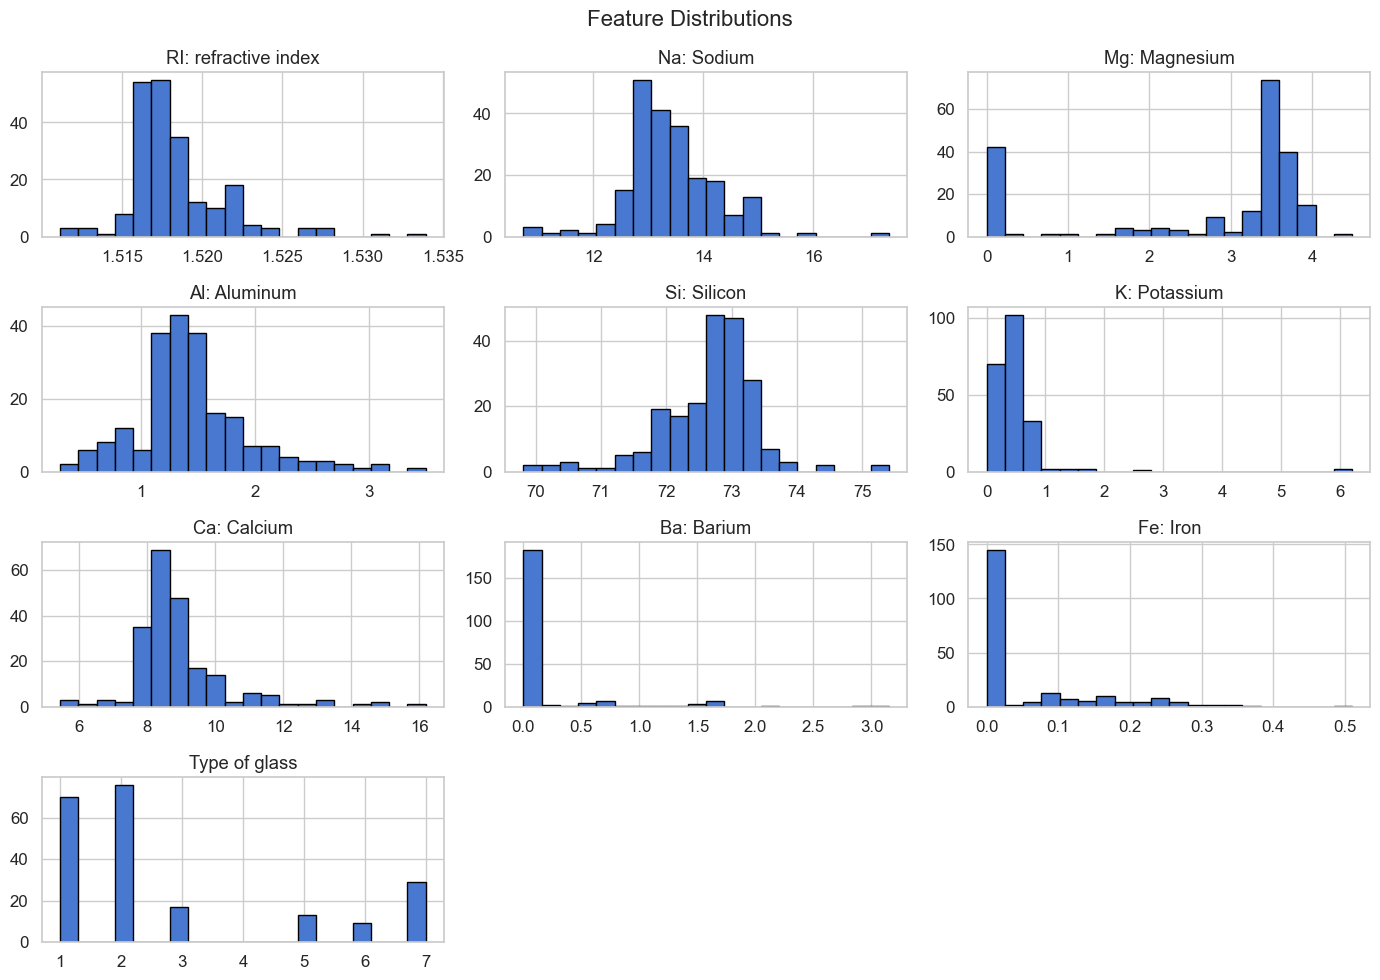

In [9]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Histograms for all features
df.hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

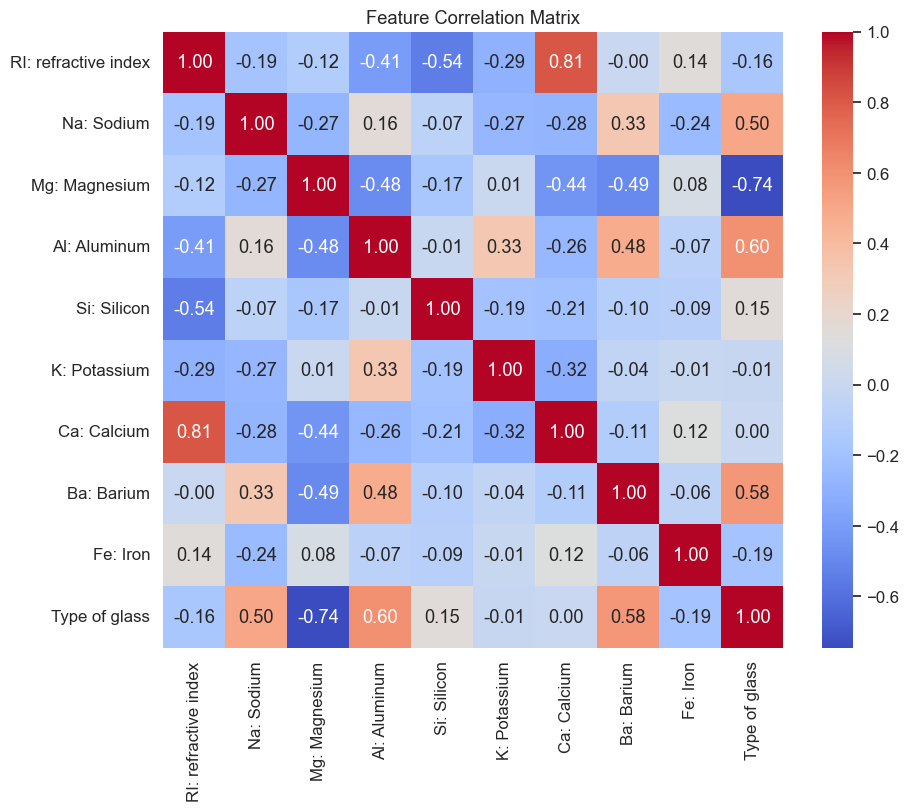

In [10]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

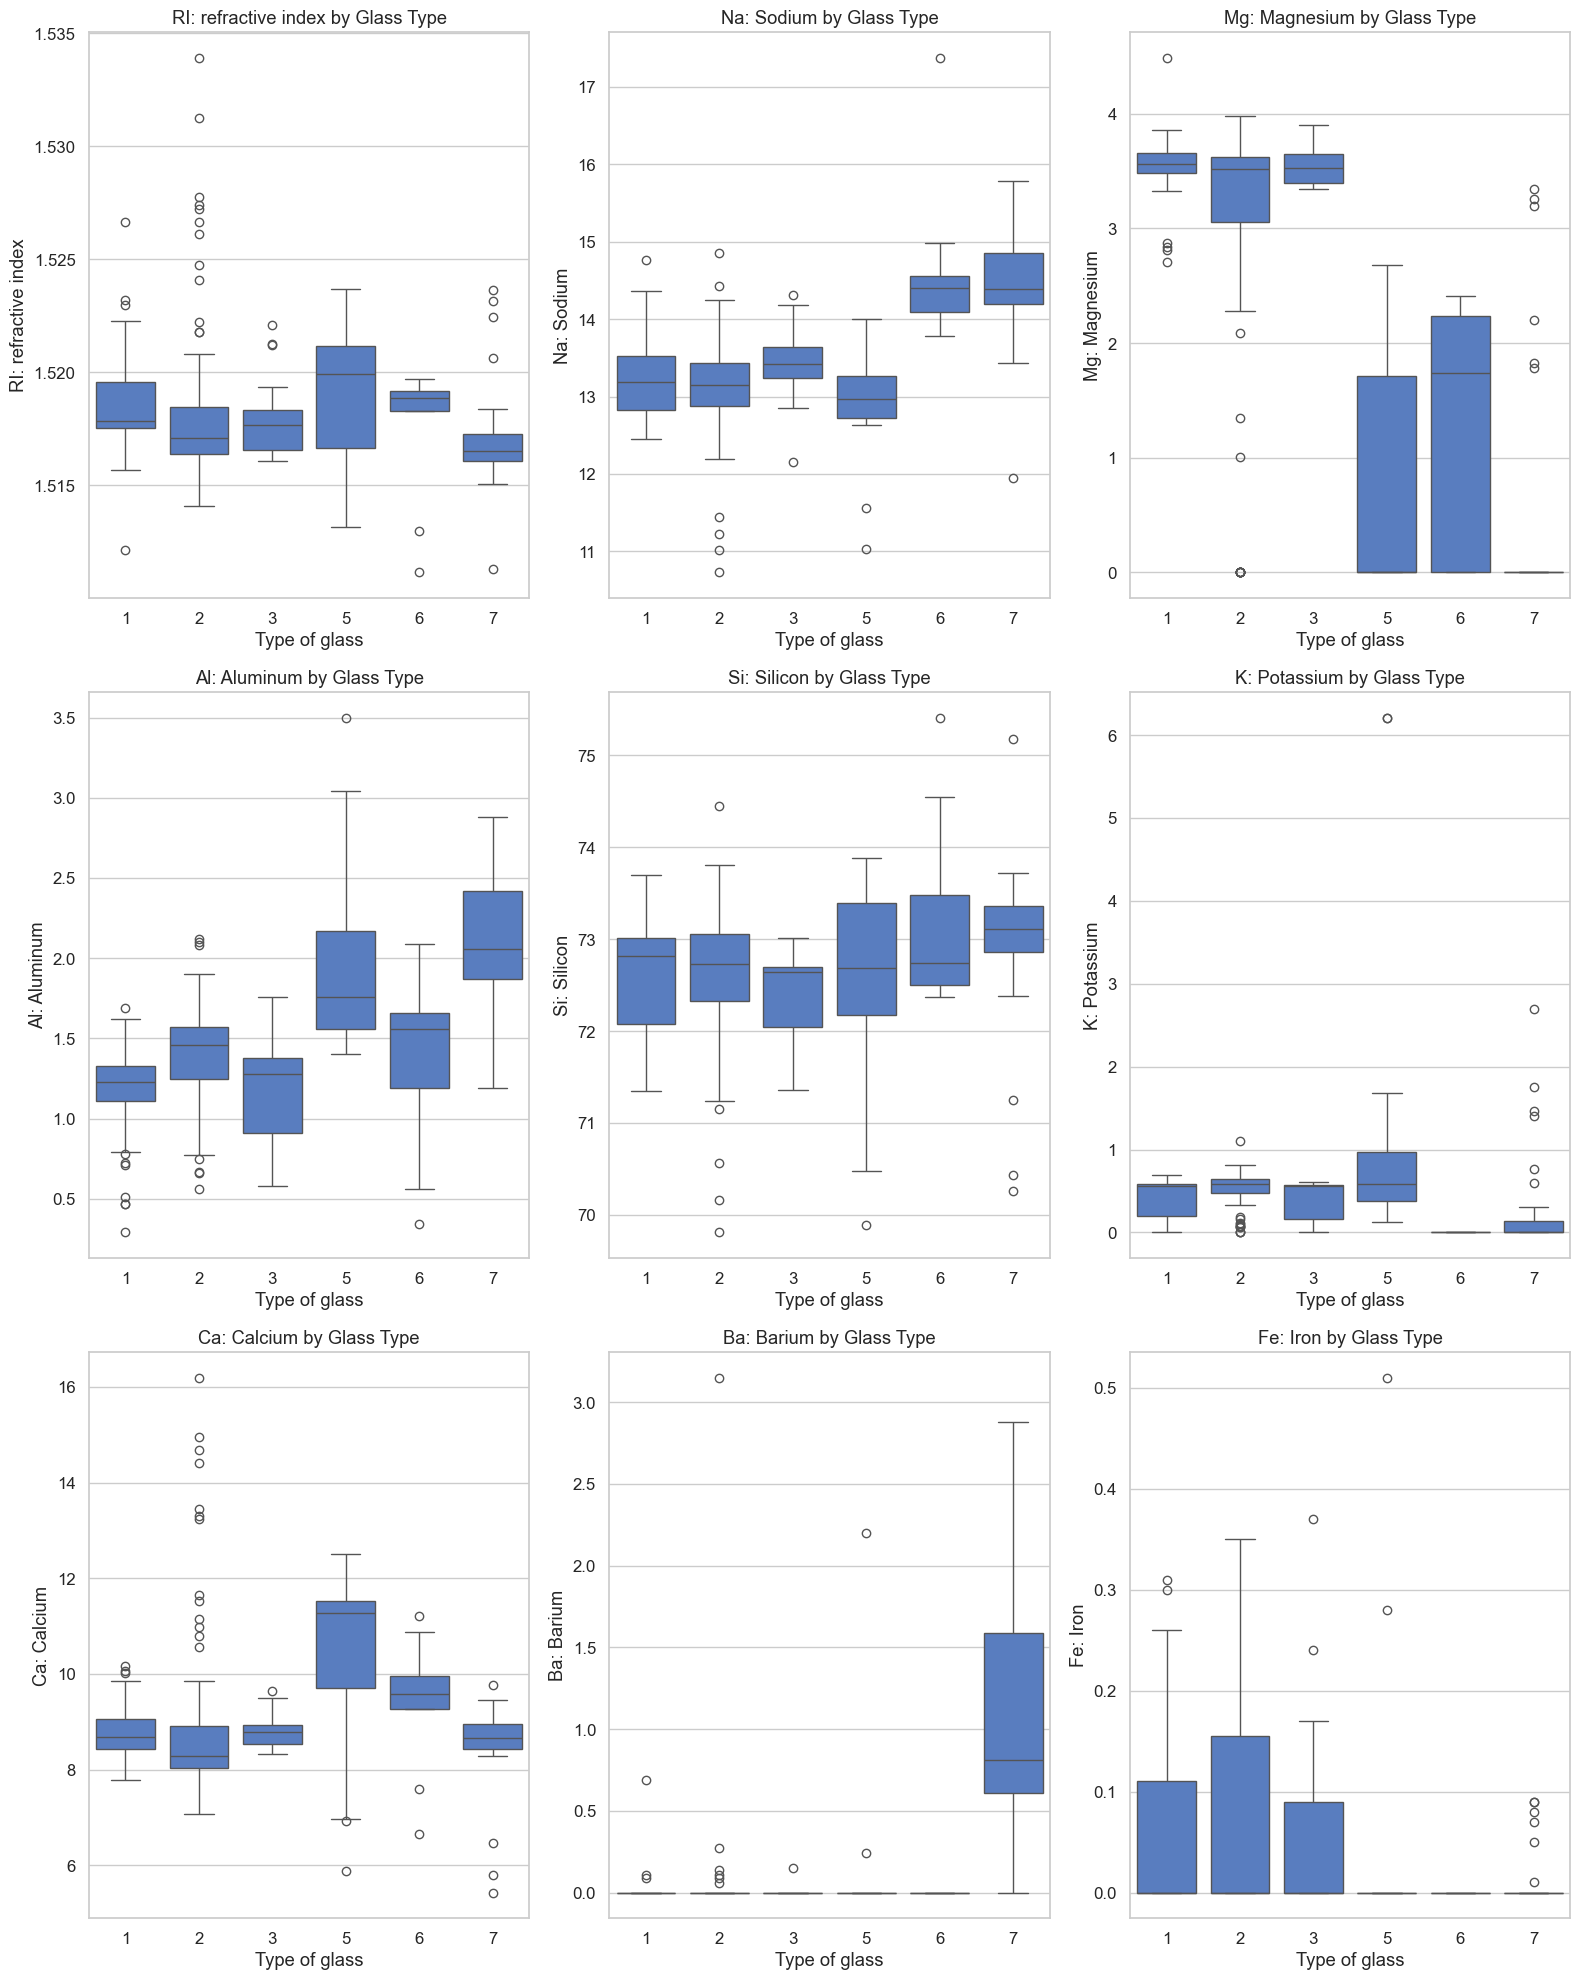

In [11]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Boxplots of features by class
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Type of glass', y=col)
    plt.title(f'{col} by Glass Type')
plt.tight_layout(rect=[0, 0, 1, 2])
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

X = df.drop('Type of glass', axis=1)
y = df['Type of glass']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
# print(f"Training Set: {y_train.shape}, Testing Set: {y_test.shape}")

Training Set: (171, 9), Testing Set: (43, 9)


In [13]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [14]:
y_pred = pipeline.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print("Model Accuracy:", accuracy)
# print("Accuracy Score:", (y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Model Accuracy: 0.8372093023255814
Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           1      0.765     0.929     0.839        14
           2      0.846     0.733     0.786        15
           3      1.000     0.667     0.800         3
           5      1.000     0.667     0.800         3
           6      0.667     1.000     0.800         2
           7      1.000     1.000     1.000         6

    accuracy                          0.837        43
   macro avg      0.880     0.833     0.837        43
weighted avg      0.854     0.837     0.836        43



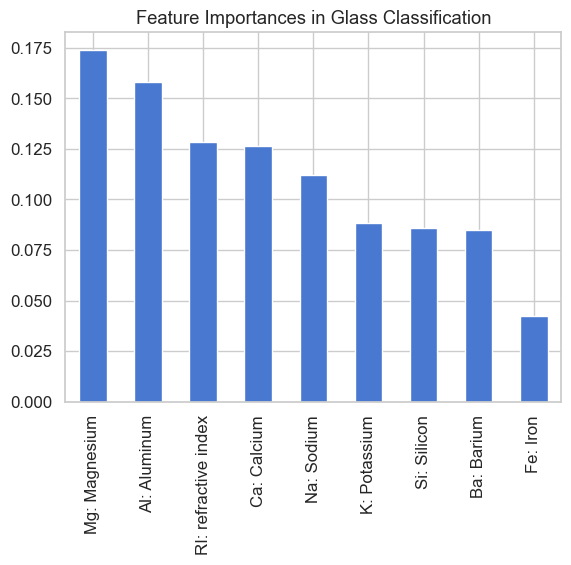

In [15]:
pipeline.feature_importances_ = pipeline.named_steps['classifier'].feature_importances_
feature_importances = pd.Series(pipeline.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances in Glass Classification")
plt.show()